# **Project Overview**
This project focuses on detecting spam messages from a dataset that contains text data labeled as either "spam" or "ham" (non-spam). The goal is to develop a classification model that can accurately differentiate between spam and non-spam messages. This is crucial for applications like email filtering, SMS spam detection, and improving overall user experience by reducing the influx of unwanted or malicious content.

**Dataset**
The dataset used for this project consists of five columns:

- **v1:** Indicates whether the message is "ham" (non-spam) or "spam".

- **v2:** Contains the text message.

- **Unnamed: 2, Unnamed: 3, Unnamed: 4:** These columns are empty or contain irrelevant data and will be ignored in the analysis.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


## import relevant labraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Load Dataset**

In [5]:
raw_data = pd.read_csv('spam.csv', encoding='latin1')
raw_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = raw_data.copy()

In [ ]:

df.shape

(5572, 5)

In [ ]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deploy

## **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)


In [ ]:
df.sample(5)

,v1,v2
2943,spam,We currently have a message awaiting your coll...
4758,spam,Thanks 4 your continued support Your question ...
2860,ham,I am not at all happy with what you saying or ...
1496,ham,I'm always on yahoo messenger now. Just send t...
2399,ham,Oh... Kay... On sat right?


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0


In [ ]:
df.rename(columns = {'v1':'Target','v2':'Text'},inplace =True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [ ]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail(5)

,Target,Text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [ ]:
## Check for duplicate values
df.duplicated().sum()

403

In [ ]:
df =df.drop_duplicates(keep ='first')

In [ ]:
df.shape

(5169, 2)

## **EDA**

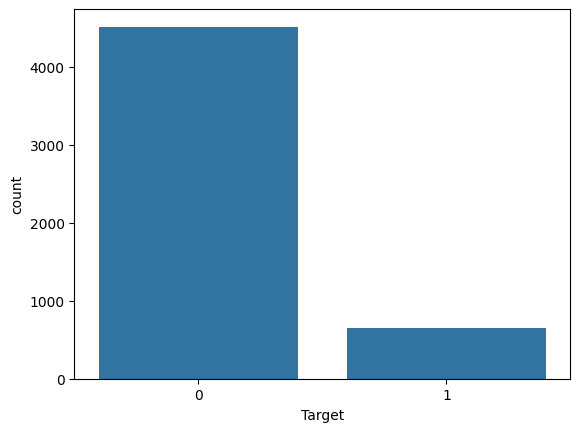

In [ ]:
sns.countplot(x=df['Target'],data=df)
plt.show()

In [ ]:
## Data is imbalanced
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_chars']=df['Text'].apply(len)

In [ ]:

df.head(5)

,Target,Text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
## Num of words
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head(5)

,Target,Text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
sum = lambda x : x+10
print(sum(10))

20


In [ ]:
## Number of Sentence
df['num_sents'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df.head(5)

,Target,Text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
## ham
df[df['Target']==0][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
## Spam
df[df['Target']==1][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


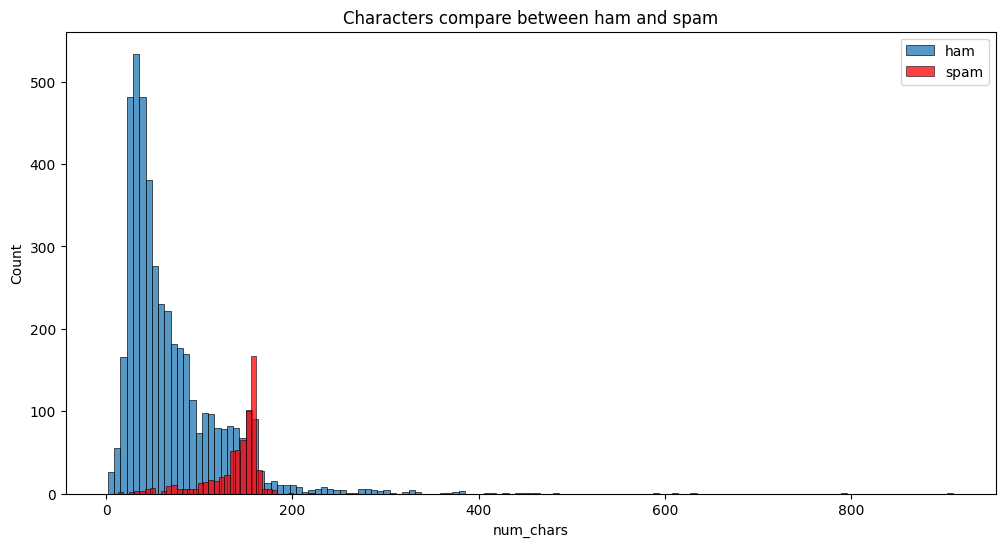

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_chars'])
sns.histplot(df[df['Target']==1]['num_chars'],color = 'red')
plt.legend(['ham','spam'])
plt.title("Characters compare between ham and spam")
plt.show()

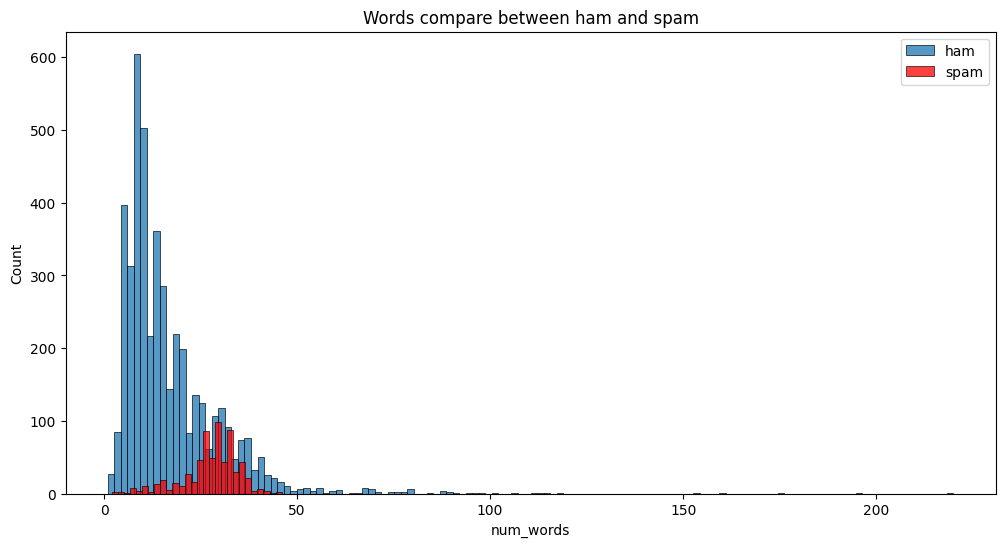

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color = 'red')
plt.legend(['ham','spam'])
plt.title("Words compare between ham and spam")
plt.show()

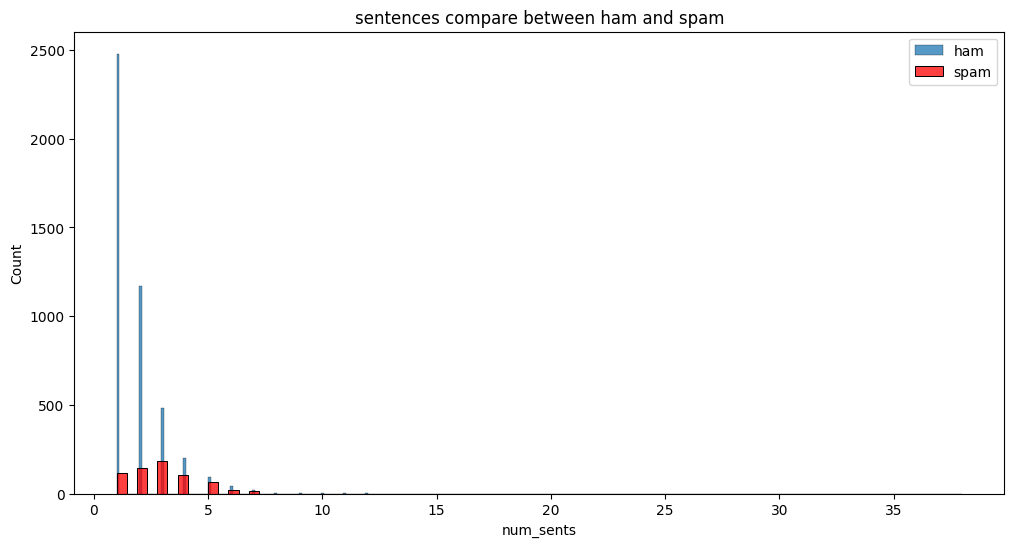

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_sents'])
sns.histplot(df[df['Target']==1]['num_sents'],color = 'red')
plt.legend(['ham','spam'])
plt.title("sentences compare between ham and spam")
plt.show()

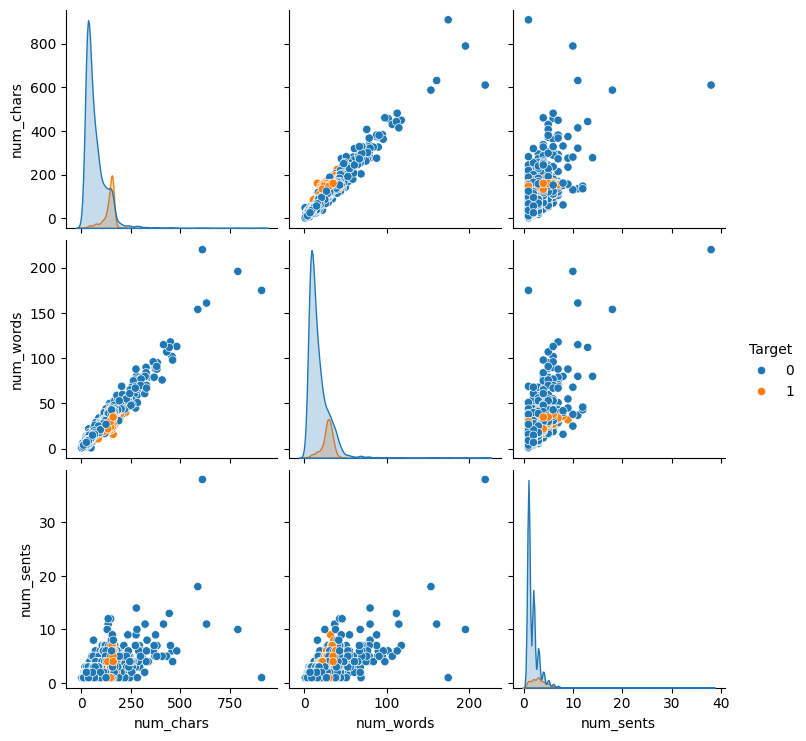

In [ ]:
sns.pairplot(df,hue = 'Target')
plt.show()

<Axes: >

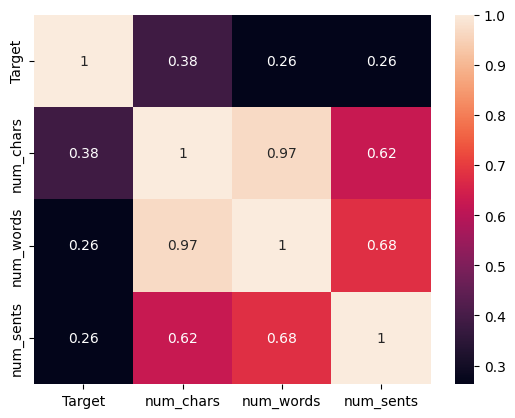

In [ ]:
sns.heatmap(df[['Target','num_chars','num_words','num_sents']].corr(),annot=True)

## **Data Preproccessing**
- Lower case
- Tokenization
- Removing special characters
- Removing Stop Words and Punctuatio
- Stemming and lemmating

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

In [ ]:
## Make a function

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y= []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in set(stopwords.words('english')) and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return ' '.join(y)


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
 df['transformed_text'] = df['Text'].apply(transform_text)

In [ ]:
df.head()

,Target,Text,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500,min_font_size = 10,background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

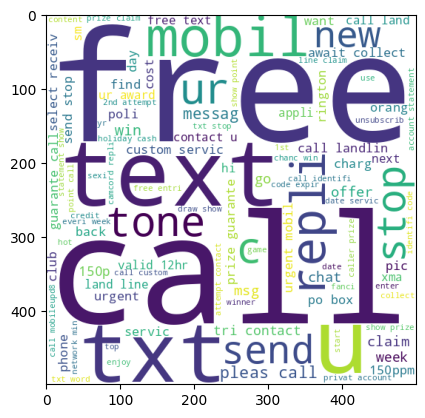

In [ ]:
plt.imshow(spam_wc)
plt.show()

In [ ]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep= " "))

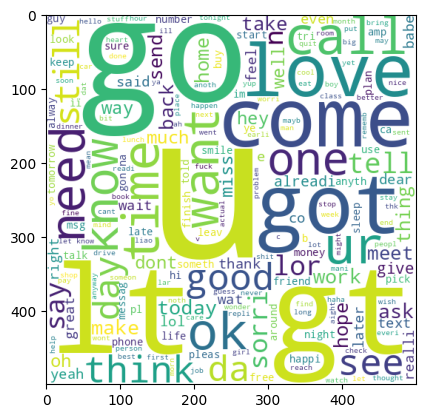

In [ ]:
plt.imshow(ham_wc)
plt.show()

In [ ]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:

from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

## **Model Building**

### **Vectorization technique: Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)


In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX= scaler.fit_transform(X)'

In [ ]:
y = df['Target'].values

In [ ]:
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
acc1 = accuracy_score(y_test,y_pred1)
conf1 = confusion_matrix(y_test,y_pred1)
precision1 = precision_score(y_test,y_pred1)

print(f"accuracy score of GaussianNb model is {acc1}")
print("-"*50)
print(f"confusion marics of GaussianNb model is \n {conf1}")
print("-"*50)
print(f"precision score of GaussianNb model is {precision1}")

accuracy score of GaussianNb model is 0.8694390715667312
--------------------------------------------------
confusion marics of GaussianNb model is 
 [[788 108]
 [ 27 111]]
--------------------------------------------------
precision score of GaussianNb model is 0.5068493150684932


## **Best Model**

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
acc2 = accuracy_score(y_test,y_pred2)
conf2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2)

print(f"accuracy score of GaussianNb model is {acc2}")
print("-"*50)
print(f"confusion marics of GaussianNb model is \n {conf2}")
print("-"*50)
print(f"precision score of GaussianNb model is {precision2}")

accuracy score of GaussianNb model is 0.9709864603481625
--------------------------------------------------
confusion marics of GaussianNb model is 
 [[896   0]
 [ 30 108]]
--------------------------------------------------
precision score of GaussianNb model is 1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
acc3 = accuracy_score(y_test,y_pred3)
conf3 = confusion_matrix(y_test,y_pred3)
precision3 = precision_score(y_test,y_pred3)

print(f"accuracy score of BernoulliNB model is {acc3}")
print("-"*50)
print(f"confusion marics of BernoulliNB model is \n {conf3}")
print("-"*50)
print(f"precision score of BernoulliNB model is {precision3}")

accuracy score of BernoulliNB model is 0.9835589941972921
--------------------------------------------------
confusion marics of BernoulliNB model is 
 [[895   1]
 [ 16 122]]
--------------------------------------------------
precision score of BernoulliNB model is 0.991869918699187


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [ ]:
svc = SVC(kernel = 'sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xbg = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
X_train.shape

(4135, 3000)

In [ ]:
y_train.shape

(4135,)

In [ ]:
models = [svc, knc, dtc, lrc, rfc, abc, bc, etc, gbdt, xbg]

for model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc= accuracy_score(y_pred,y_test)
  precision = precision_score(y_pred,y_test)
  print(model)
  print(f"accuracy score  is {acc}")
  print(f"precision score  is {precision}")
  print("_"*50)


SVC(gamma=1.0, kernel='sigmoid')
accuracy score  is 0.9758220502901354
precision score  is 0.8405797101449275
__________________________________________________
KNeighborsClassifier()
accuracy score  is 0.9052224371373307
precision score  is 0.2898550724637681
__________________________________________________
DecisionTreeClassifier(max_depth=5)
accuracy score  is 0.9294003868471954
precision score  is 0.5942028985507246
__________________________________________________
LogisticRegression(solver='liblinear')
accuracy score  is 0.9564796905222437
precision score  is 0.6884057971014492
__________________________________________________
RandomForestClassifier(n_estimators=50, random_state=2)
accuracy score  is 0.9758220502901354
precision score  is 0.8333333333333334
__________________________________________________
AdaBoostClassifier(random_state=2)
accuracy score  is 0.960348162475822
precision score  is 0.7608695652173914
__________________________________________________
BaggingClas

In [ ]:
import pickle

# Saving the tfidf vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

# Saving the mnb model
with open('model.pkl', 'wb') as file:
    pickle.dump(mnb, file)


In [ ]:
from google.colab import files

# Download the vectorizer.pkl file
files.download('vectorizer.pkl')

# Download the model.pkl file
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>